In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_raw = pd.read_csv("./TestDataSet.csv")
test_raw.head()

,Company Symbol,Company Name,FDS Ticker Symbol,Sedol,Entity Country Incorp,MSCI Country,Curncy Iso,Value Traded,Market Value,Unnamed: 9,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Boeing Company,BA-US,2108601,United States,United States,USD,1327808000,263447.00,1,...,90762.0,90079.0,88425.0,88195.0,86623.0,85140.0,83018.0,81208.0,81698.0,78951.0
1,UTX,United Technologies Corporation,UTX-US,2915500,United States,United States,USD,323256200,164934.80,1,...,65196.0,64921.0,64190.0,63007.0,62651.0,62327.0,61901.0,59695.0,57701.0,56226.0
2,LMT,Lockheed Martin Corporation,LMT-US,2522096,United States,United States,USD,281338700,143118.00,1,...,45600.0,44603.0,44836.0,44938.0,45358.0,45924.0,46446.0,46959.0,47182.0,47294.0
3,UPS,"United Parcel Service, Inc. Class B",UPS-US,2517382,United States,United States,USD,243005600,133350.30,1,...,58258.0,57361.0,56592.0,55831.0,55491.0,55044.0,54543.0,54364.0,54064.0,53708.0
4,RTN,Raytheon Company,RTN-US,2758051,United States,United States,USD,236887500,79148.73,1,...,22826.0,22553.0,22921.0,23335.0,23706.0,24275.0,24477.0,24356.0,24417.0,24419.0


In [3]:
sales_raw = test_raw.drop(columns = ["Company Name","FDS Ticker Symbol","Sedol","Entity Country Incorp",
                                    "MSCI Country","Curncy Iso","Value Traded","Market Value","Unnamed: 9"])
sales_raw_columns = len(sales_raw.columns)
print(f"# columns for sales_raw = {sales_raw_columns}")
sales_raw.head()

# columns for sales_raw = 31


,Company Symbol,GICS Sub Ind Name,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,Net Sales.5,Net Sales.6,Net Sales.7,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Aerospace & Defense,86989.0,92149.0,100657.0,101127.0,98154.0,97317.0,95798.0,93392.0,...,90762.0,90079.0,88425.0,88195.0,86623.0,85140.0,83018.0,81208.0,81698.0,78951.0
1,UTX,Aerospace & Defense,75589.0,72585.0,69639.0,66485.0,64086.0,62612.0,61193.0,59798.0,...,65196.0,64921.0,64190.0,63007.0,62651.0,62327.0,61901.0,59695.0,57701.0,56226.0
2,LMT,Aerospace & Defense,58345.0,57492.0,56463.0,53762.0,54488.0,52339.0,51626.0,51048.0,...,45600.0,44603.0,44836.0,44938.0,45358.0,45924.0,46446.0,46959.0,47182.0,47294.0
3,UPS,Air Freight & Logistics,73238.0,72426.0,71893.0,71911.0,70904.0,69438.0,67705.0,65840.0,...,58258.0,57361.0,56592.0,55831.0,55491.0,55044.0,54543.0,54364.0,54064.0,53708.0
4,RTN,Aerospace & Defense,28694.0,28054.0,27520.0,27058.0,26481.0,25959.0,25615.0,25348.0,...,22826.0,22553.0,22921.0,23335.0,23706.0,24275.0,24477.0,24356.0,24417.0,24419.0


In [4]:
for i in range(2,len(sales_raw.columns)-4):
    new_column_header = "Sales Growth" + str(i)
    sales_raw[new_column_header] = sales_raw.iloc[:,i]/sales_raw.iloc[:,i+4] - 1
 
sales_raw.head()

,Company Symbol,GICS Sub Ind Name,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,Net Sales.5,Net Sales.6,Net Sales.7,...,Sales Growth17,Sales Growth18,Sales Growth19,Sales Growth20,Sales Growth21,Sales Growth22,Sales Growth23,Sales Growth24,Sales Growth25,Sales Growth26
0,BA,Aerospace & Defense,86989.0,92149.0,100657.0,101127.0,98154.0,97317.0,95798.0,93392.0,...,0.058967,0.076932,0.073723,0.048200,0.047782,0.058010,0.065130,0.086038,0.060283,0.078390
1,UTX,Aerospace & Defense,75589.0,72585.0,69639.0,66485.0,64086.0,62612.0,61193.0,59798.0,...,-0.092030,-0.047103,0.000203,0.032123,0.040622,0.041619,0.036978,0.055482,0.085787,0.108509
2,LMT,Aerospace & Defense,58345.0,57492.0,56463.0,53762.0,54488.0,52339.0,51626.0,51048.0,...,0.011667,0.025604,0.012535,0.002737,0.005335,-0.028765,-0.034664,-0.043038,-0.038659,-0.028968
3,UPS,Air Freight & Logistics,73238.0,72426.0,71893.0,71911.0,70904.0,69438.0,67705.0,65840.0,...,-0.003570,0.010669,0.026753,0.045441,0.049864,0.042094,0.037567,0.026985,0.026395,0.024875
4,RTN,Aerospace & Defense,28694.0,28054.0,27520.0,27058.0,26481.0,25959.0,25615.0,25348.0,...,0.018444,0.022569,-0.007330,-0.031241,-0.037121,-0.070937,-0.063570,-0.041920,-0.029119,-0.005897


In [5]:
sales_growth_raw = sales_raw.drop(sales_raw.iloc[:,2:sales_raw_columns],axis = 1)
sales_growth_raw.head()

,Company Symbol,GICS Sub Ind Name,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,...,Sales Growth17,Sales Growth18,Sales Growth19,Sales Growth20,Sales Growth21,Sales Growth22,Sales Growth23,Sales Growth24,Sales Growth25,Sales Growth26
0,BA,Aerospace & Defense,-0.113750,-0.053105,0.050721,0.082823,0.074953,0.070606,0.031028,-0.012467,...,0.058967,0.076932,0.073723,0.048200,0.047782,0.058010,0.065130,0.086038,0.060283,0.078390
1,UTX,Aerospace & Defense,0.179493,0.159283,0.138022,0.111826,0.089268,0.076140,0.058409,0.041505,...,-0.092030,-0.047103,0.000203,0.032123,0.040622,0.041619,0.036978,0.055482,0.085787,0.108509
2,LMT,Aerospace & Defense,0.070786,0.098454,0.093693,0.053166,0.097155,0.067163,0.047733,0.022617,...,0.011667,0.025604,0.012535,0.002737,0.005335,-0.028765,-0.034664,-0.043038,-0.038659,-0.028968
3,UPS,Air Freight & Logistics,0.032918,0.043031,0.061857,0.092208,0.111139,0.107835,0.101252,0.088228,...,-0.003570,0.010669,0.026753,0.045441,0.049864,0.042094,0.037567,0.026985,0.026395,0.024875
4,RTN,Aerospace & Defense,0.083569,0.080704,0.074370,0.067461,0.067653,0.057307,0.053855,0.053139,...,0.018444,0.022569,-0.007330,-0.031241,-0.037121,-0.070937,-0.063570,-0.041920,-0.029119,-0.005897


In [6]:
sales_grows_by_cate = sales_growth_raw.groupby(["GICS Sub Ind Name"]).mean()
sales_grows_by_cate

,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,Sales Growth10,Sales Growth11,...,Sales Growth17,Sales Growth18,Sales Growth19,Sales Growth20,Sales Growth21,Sales Growth22,Sales Growth23,Sales Growth24,Sales Growth25,Sales Growth26
GICS Sub Ind Name,,,,,,,,,,,,,,,,,,,,,
Advertising,0.038114,0.050368,0.077707,0.100416,0.091890,0.072526,0.026760,-0.006936,-0.023584,-0.029955,...,-0.000303,0.029476,0.050350,0.064111,0.078430,0.053401,0.025255,0.003186,-0.016417,-0.024297
Aerospace & Defense,0.099906,0.077016,0.086423,0.080158,0.074626,0.075115,0.059973,0.051619,0.046746,0.036008,...,0.022233,0.019775,0.017712,0.028379,0.037939,0.057227,0.060729,0.053960,0.041368,0.033245
Agricultural & Farm Machinery,-0.015940,-0.003191,0.057408,0.103777,0.138814,0.155395,0.137787,0.107207,0.066780,0.039313,...,-0.138869,-0.138072,-0.104609,-0.093956,-0.073513,-0.041225,-0.017291,0.048994,0.107550,0.129204
Agricultural Products,-0.019855,-0.035421,-0.016481,-0.005649,0.010101,0.020237,0.009638,0.025362,0.027449,0.024364,...,-0.101400,-0.035093,0.033913,0.179927,0.353936,0.262521,0.169402,0.063146,-0.003180,0.000428
Air Freight & Logistics,0.006055,0.042521,0.101568,0.150790,0.176212,0.172812,0.148910,0.121043,0.096767,0.086837,...,0.310599,0.282711,0.263655,0.339300,0.361461,0.337874,0.310520,0.235259,0.231933,0.247200
Airlines,0.039438,0.050225,0.051848,0.062935,0.070198,0.070073,0.088646,0.087221,0.074206,0.058279,...,0.023869,0.040417,0.062389,0.097978,0.119912,0.118167,0.100396,0.065912,0.049897,0.038024


<function matplotlib.pyplot.show(*args, **kw)>

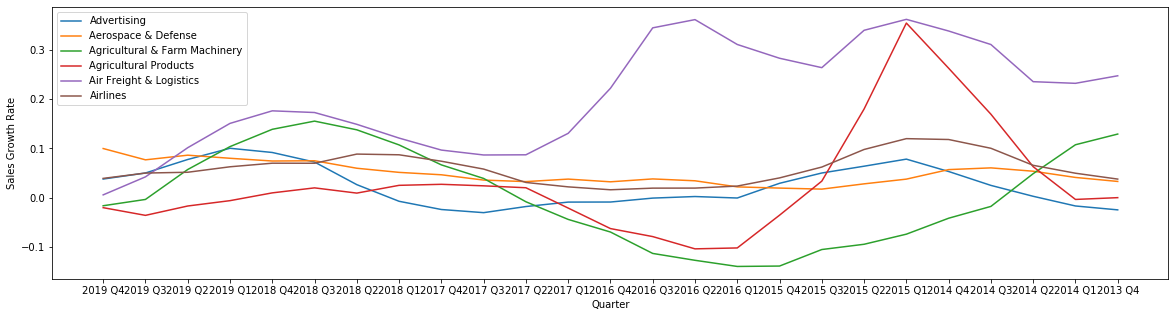

In [7]:
line_x = ["2019 Q4","2019 Q3","2019 Q2","2019 Q1","2018 Q4","2018 Q3","2018 Q2","2018 Q1","2017 Q4","2017 Q3","2017 Q2",
          "2017 Q1","2016 Q4","2016 Q3","2016 Q2","2016 Q1","2015 Q4","2015 Q3","2015 Q2","2015 Q1","2014 Q4","2014 Q3",
          "2014 Q2","2014 Q1","2013 Q4"]
plt.figure(figsize=(20,5))
plt.plot(line_x,sales_grows_by_cate.iloc[0],label = "Advertising")
plt.plot(line_x,sales_grows_by_cate.iloc[1],label = "Aerospace & Defense")
plt.plot(line_x,sales_grows_by_cate.iloc[2],label = "Agricultural & Farm Machinery")
plt.plot(line_x,sales_grows_by_cate.iloc[3],label = "Agricultural Products")
plt.plot(line_x,sales_grows_by_cate.iloc[4],label = "Air Freight & Logistics")
plt.plot(line_x,sales_grows_by_cate.iloc[5],label = "Airlines")
plt.xlabel("Quarter")
plt.ylabel("Sales Growth Rate")
plt.legend()
plt.show